# Model

$ p \sim Beta(patient, death)  $

$ \\ Y_{obs} \sim \operatorname{Binomial}(patient_i ,p)$

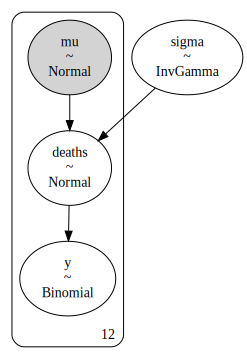

In [96]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc as pm
from scipy import stats
from scipy.stats import entropy
from scipy.optimize import minimize
from pymc import traceplot
from scipy.stats import binom
from scipy.stats import norm
import pytensor.tensor as pt
az.style.use("arviz-grayscale")
plt.rcParams['figure.dpi'] = 75
np.random.seed(521)

from warnings import filterwarnings
import logging
filterwarnings(
    'ignore', category=UserWarning, module='pymc',
    message="Unable to validate shapes: Cannot sample from flat variable",
)
filterwarnings('ignore', category=RuntimeWarning, module='pymc')
def filter_metropolis(record):
    return not (record.msg.startswith(">Metropolis") or record.msg == "CompoundStep")

logging.getLogger('pymc').addFilter(filter_metropolis)

hospitals = [1,2,3,4,5,6,7,8,9,10,11,12]
patients = [47,148,119,810,211,196,148,215,207,97,256,360]
deaths = [0.0001,18,8,46,8,13,9,31,14,8,29,24]
n_features = len(hospitals)

p_true = [int(b) / int(m) for b,m in zip(deaths, patients)]
n = sum(patients)
K = len(hospitals)
mean_patient = sum(p for p in patients) / (len(hospitals)+1)


with pm.Model() as logit_model:
    # patients_ = pm.Normal("patients", mu = mean_patient, sigma = 100, observed = patients)
    mu = pm.Normal("mu", mu=0,sigma=1e6, observed = deaths)
    sigma = pm.InverseGamma("sigma", mu=0.001,sigma=0.001)
    deaths_ = pm.Normal("deaths", mu=mu, sigma = sigma)
    #p = pm.math.invlogit(deaths_)
    #patients_ = pm.Normal("patients", observed = patients)
    #deaths_ = pm.Normal("deaths", observed = deaths)

    #u = pm.Normal("u", mu=0, sigma=0.001, observed = deaths)
    #deaths_ = pm.Normal("deaths")
    # p = pm.Beta(
    #     'p',
    #     alpha=patients,
    #     beta=deaths_,
    #     shape = n_features
    # )
    y = pm.Binomial(
        "y",
        n = patients,
        p = pm.math.invlogit(deaths_),
        #p = pm.math.logit(deaths_),
        #logit_p: deaths_,
        #observed = deaths_,
        shape = n_features
    )
pm.model_to_graphviz(logit_model)

In [97]:
with logit_model:
    logit_trace = pm.sample()
    #logit_trace = pm.sample()
az.summary(logit_trace)

/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:591: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:591: RuntimeWarning: invalid value encountered in sqrt
  rhat_value = np.sqrt(
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagnostics.py:592: RuntimeWarning: invalid value encountered in double_scalars
  (between_chain_variance / within_chain_variance + num_samples - 1) / (num_samples)
/usr/local/lib/python3.10/dist-packages/arviz/stats/diagn

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
deaths[0],1015822.657,913656.934,11928.867,2060316.765,641190.919,541549.023,3.0,28.0,2.31
deaths[1],-326485.336,355041.065,-1079106.652,-1005.098,136631.148,101123.332,5.0,23.0,1.34
deaths[2],225215.297,562575.858,-454683.127,1564212.982,313594.658,245674.770,3.0,11.0,2.32
deaths[3],214495.557,355512.613,-168354.908,914452.337,189833.613,147311.573,3.0,45.0,1.84
deaths[4],-345983.013,320423.824,-968783.384,-420.322,160947.885,123423.299,4.0,50.0,1.40
deaths[5],-141363.973,372471.413,-866384.250,488108.625,209737.910,164705.976,3.0,18.0,2.09
deaths[6],428765.927,368846.374,29.365,1058318.524,232209.530,188130.223,3.0,28.0,1.97
deaths[7],-219401.600,462272.425,-1058097.884,310758.220,283009.106,227294.503,3.0,35.0,2.09
deaths[8],-220140.321,208754.549,-677528.755,-899.839,64874.146,47230.958,14.0,13.0,1.11
deaths[9],68581.040,248312.440,-266403.114,586294.532,144405.191,114319.196,3.0,13.0,1.95


In [92]:
logit_model.debug()

point={'mu': array(0.), 'sigma_log__': array(-6.90775528), 'y': array([ 24,  74,  60, 405, 105,  98,  74, 108, 103,  48, 128, 180])}

The variable y has the following parameters:
0: [ 47 148 1 ... 7 256 360] [id A] <Vector(int32, shape=(12,))>
1: [0.500025 ... .        ] [id B] <Vector(float64, shape=(12,))>
The parameters evaluate to:
0: [ 47 148 119 810 211 196 148 215 207  97 256 360]
1: [0.500025   0.99999998 0.99966465 1.         0.99966465 0.99999774
 0.99987661 1.         0.99999917 0.99966465 1.         1.        ]
Some of the values of variable y are associated with a non-finite logp:
 value = 405 -> logp = -inf

You can set `verbose=True` for more details


KeyError: 'y_obs'

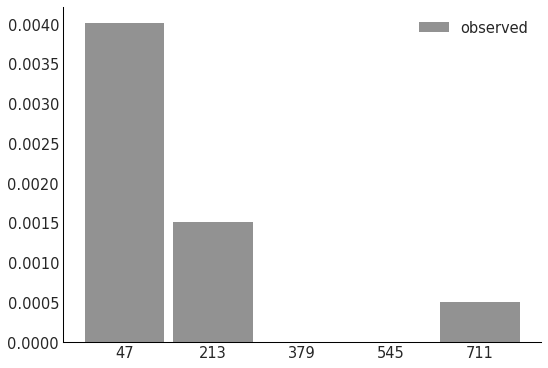

In [ ]:
az.plot_dist(
    patients,
    kind="hist",
    color="C1",
    hist_kwargs=dict(alpha=0.6),
    label="observed",
)
az.plot_dist(
    logit_trace["y_obs"],
    kind="hist",
    hist_kwargs=dict(alpha=0.6),
    label="simulated",
)
plt.xticks(rotation=45);

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

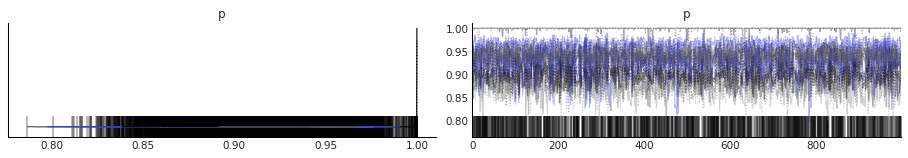

In [ ]:
az.plot_trace(logit_trace, var_names=['p'])

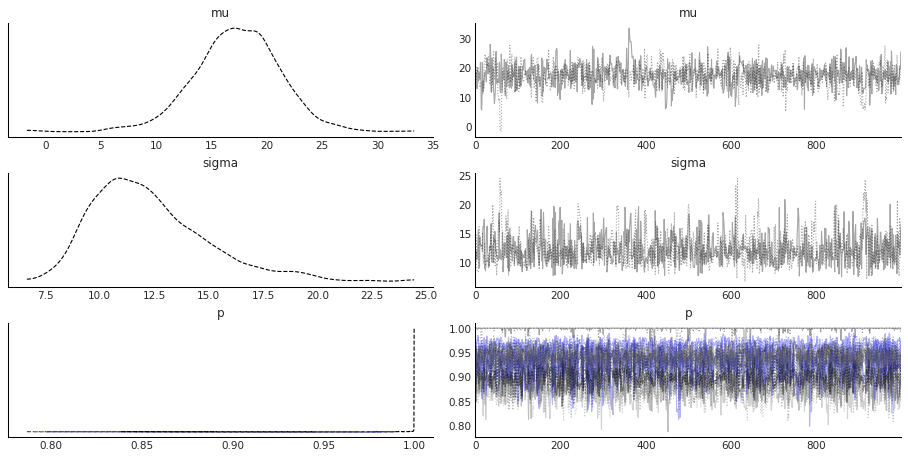

In [ ]:
az.plot_trace(logit_trace.posterior, combined=True);

In [ ]:
logit_model.debug()

point={'p_logodds__': array([       inf, 2.10684052, 2.69968195, 2.86839285, 3.27241659,
       2.7131653 , 2.7999877 , 1.93665082, 2.69366146, 2.49526944,
       2.17788161, 2.7080502 ]), 'death_rate': array([ 47, 132, 112, 766, 203, 184, 140, 188, 194,  90, 230, 338])}

The variable p has the following parameters:
0: [ 47. 148. ... 256. 360.] [id A] <Vector(float64, shape=(12,))>
1: [ 0. 18. ... . 29. 24.] [id B] <Vector(float64, shape=(12,))>
The parameters evaluate to:
0: [ 47. 148. 119. 810. 211. 196. 148. 215. 207.  97. 256. 360.]
1: [ 0. 18.  8. 46.  8. 13.  9. 31. 14.  8. 29. 24.]
This does not respect one of the following constraints: alpha > 0, beta > 0

You can set `verbose=True` for more details


array([[<Axes: title={'center': 'p\n0'}>,
        <Axes: title={'center': 'p\n1'}>,
        <Axes: title={'center': 'p\n2'}>],
       [<Axes: title={'center': 'p\n3'}>,
        <Axes: title={'center': 'p\n4'}>,
        <Axes: title={'center': 'p\n5'}>],
       [<Axes: title={'center': 'p\n6'}>,
        <Axes: title={'center': 'p\n7'}>,
        <Axes: title={'center': 'p\n8'}>],
       [<Axes: title={'center': 'p\n9'}>,
        <Axes: title={'center': 'p\n10'}>,
        <Axes: title={'center': 'p\n11'}>]], dtype=object)

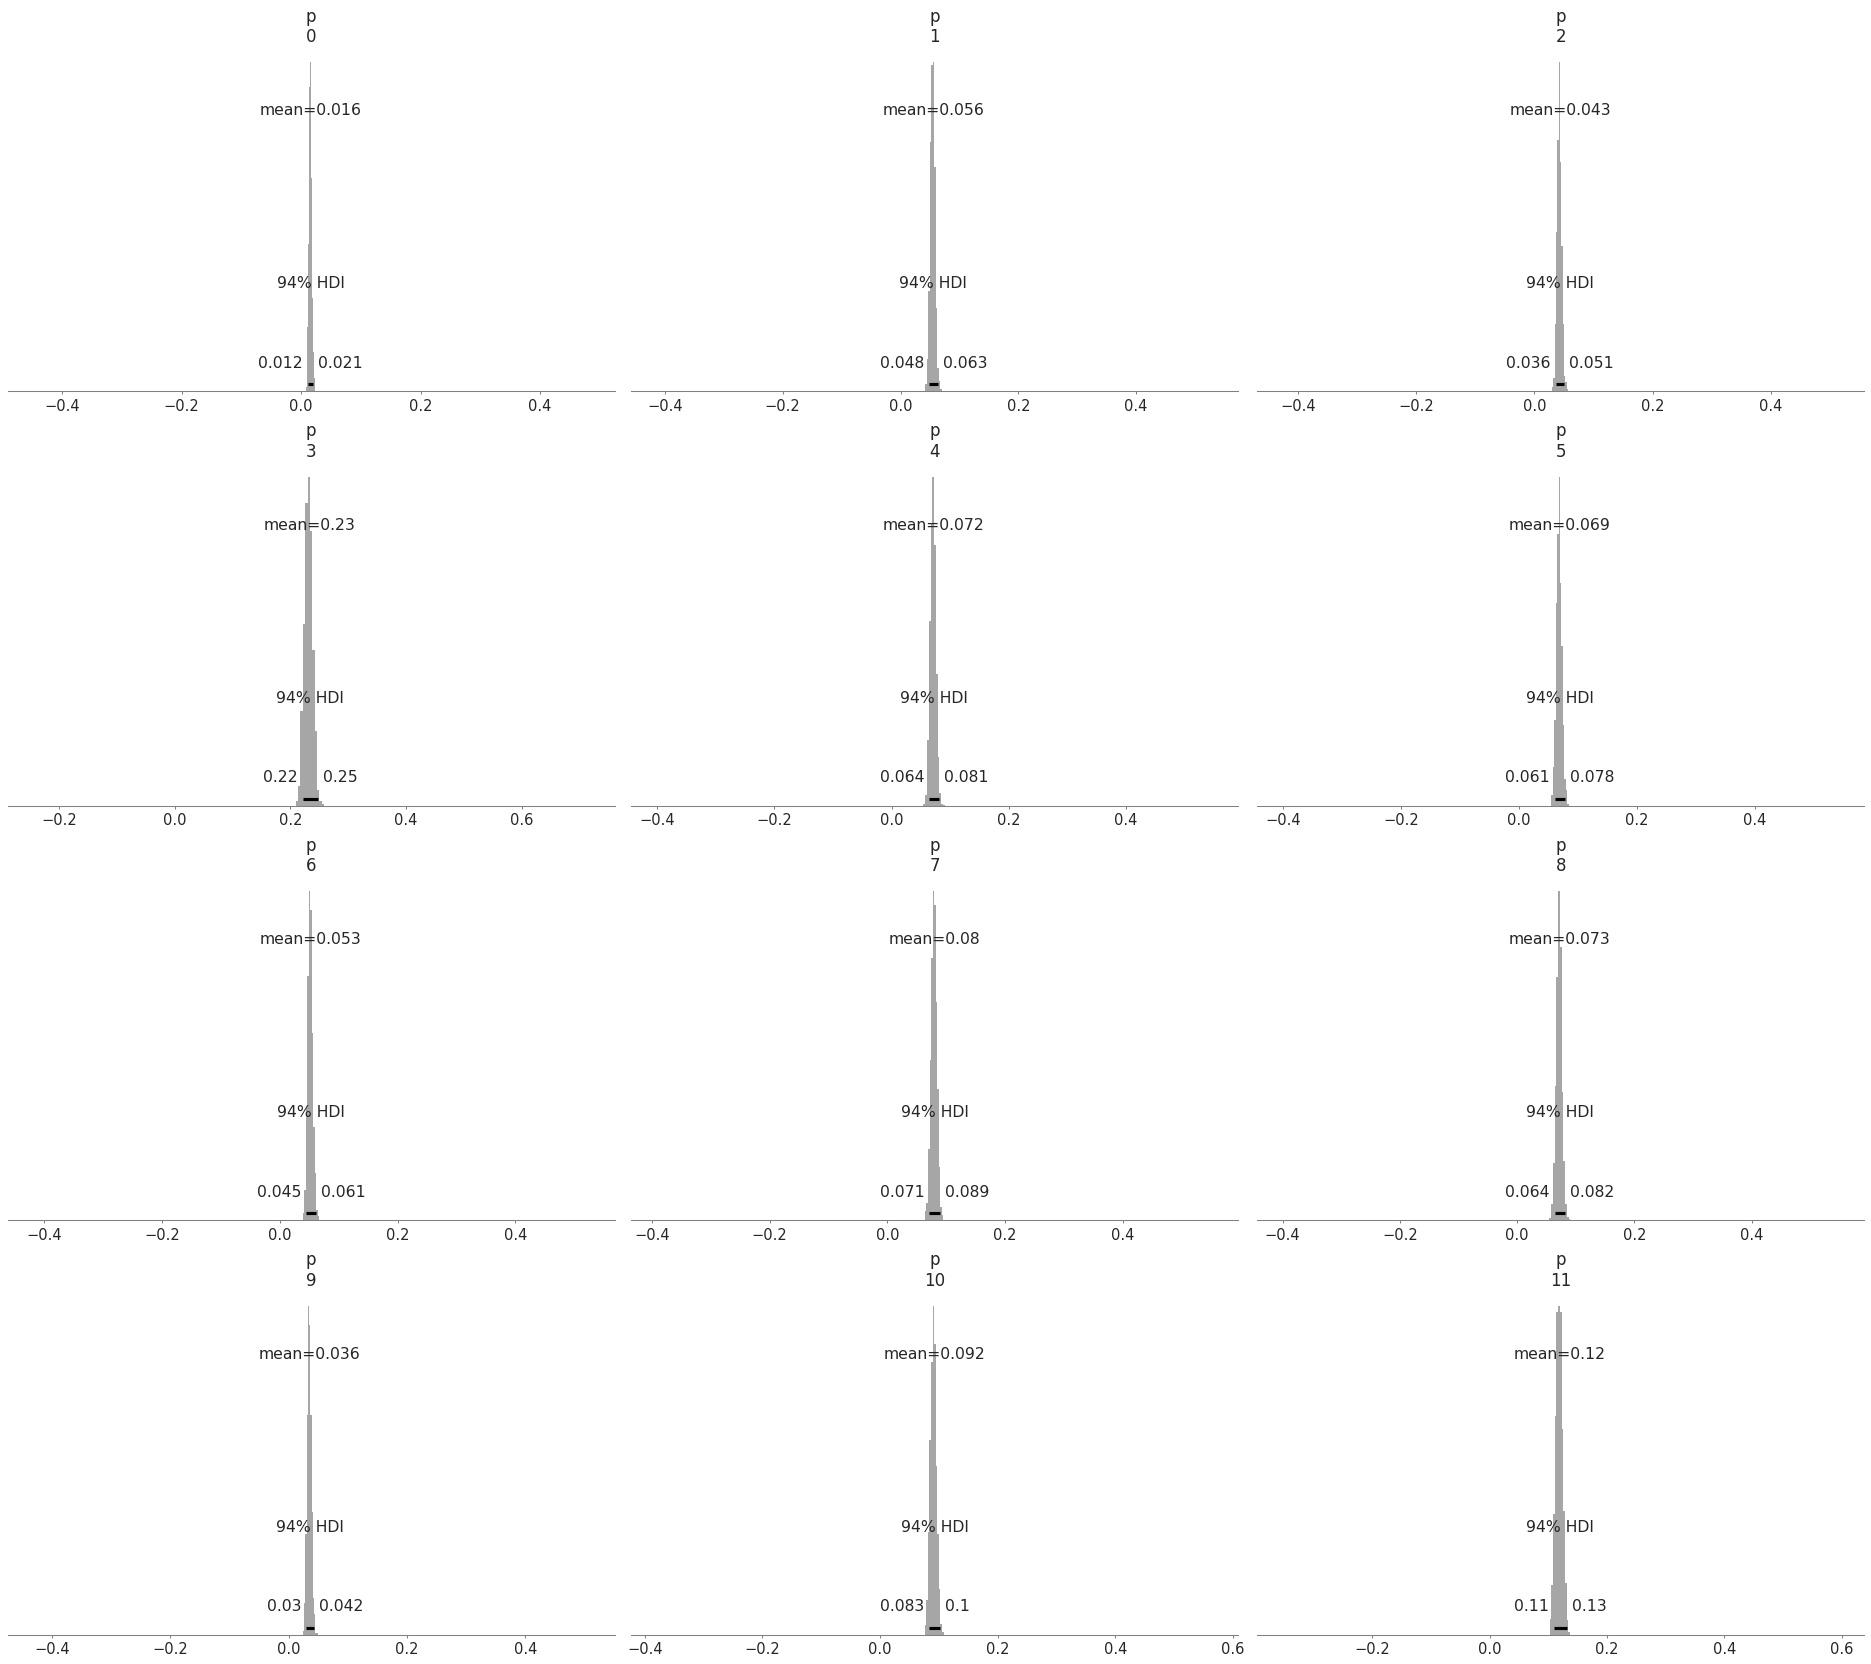

In [ ]:
az.plot_posterior(logit_trace, kind='hist')

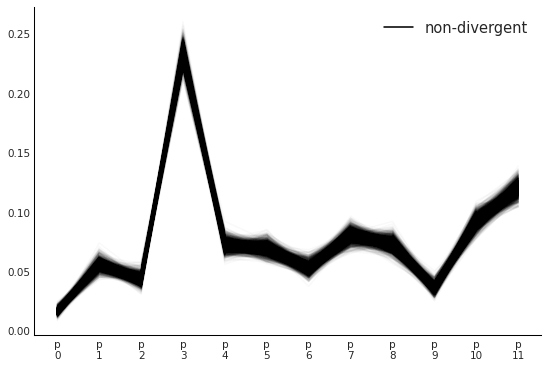

In [ ]:
az.plot_parallel(logit_trace);

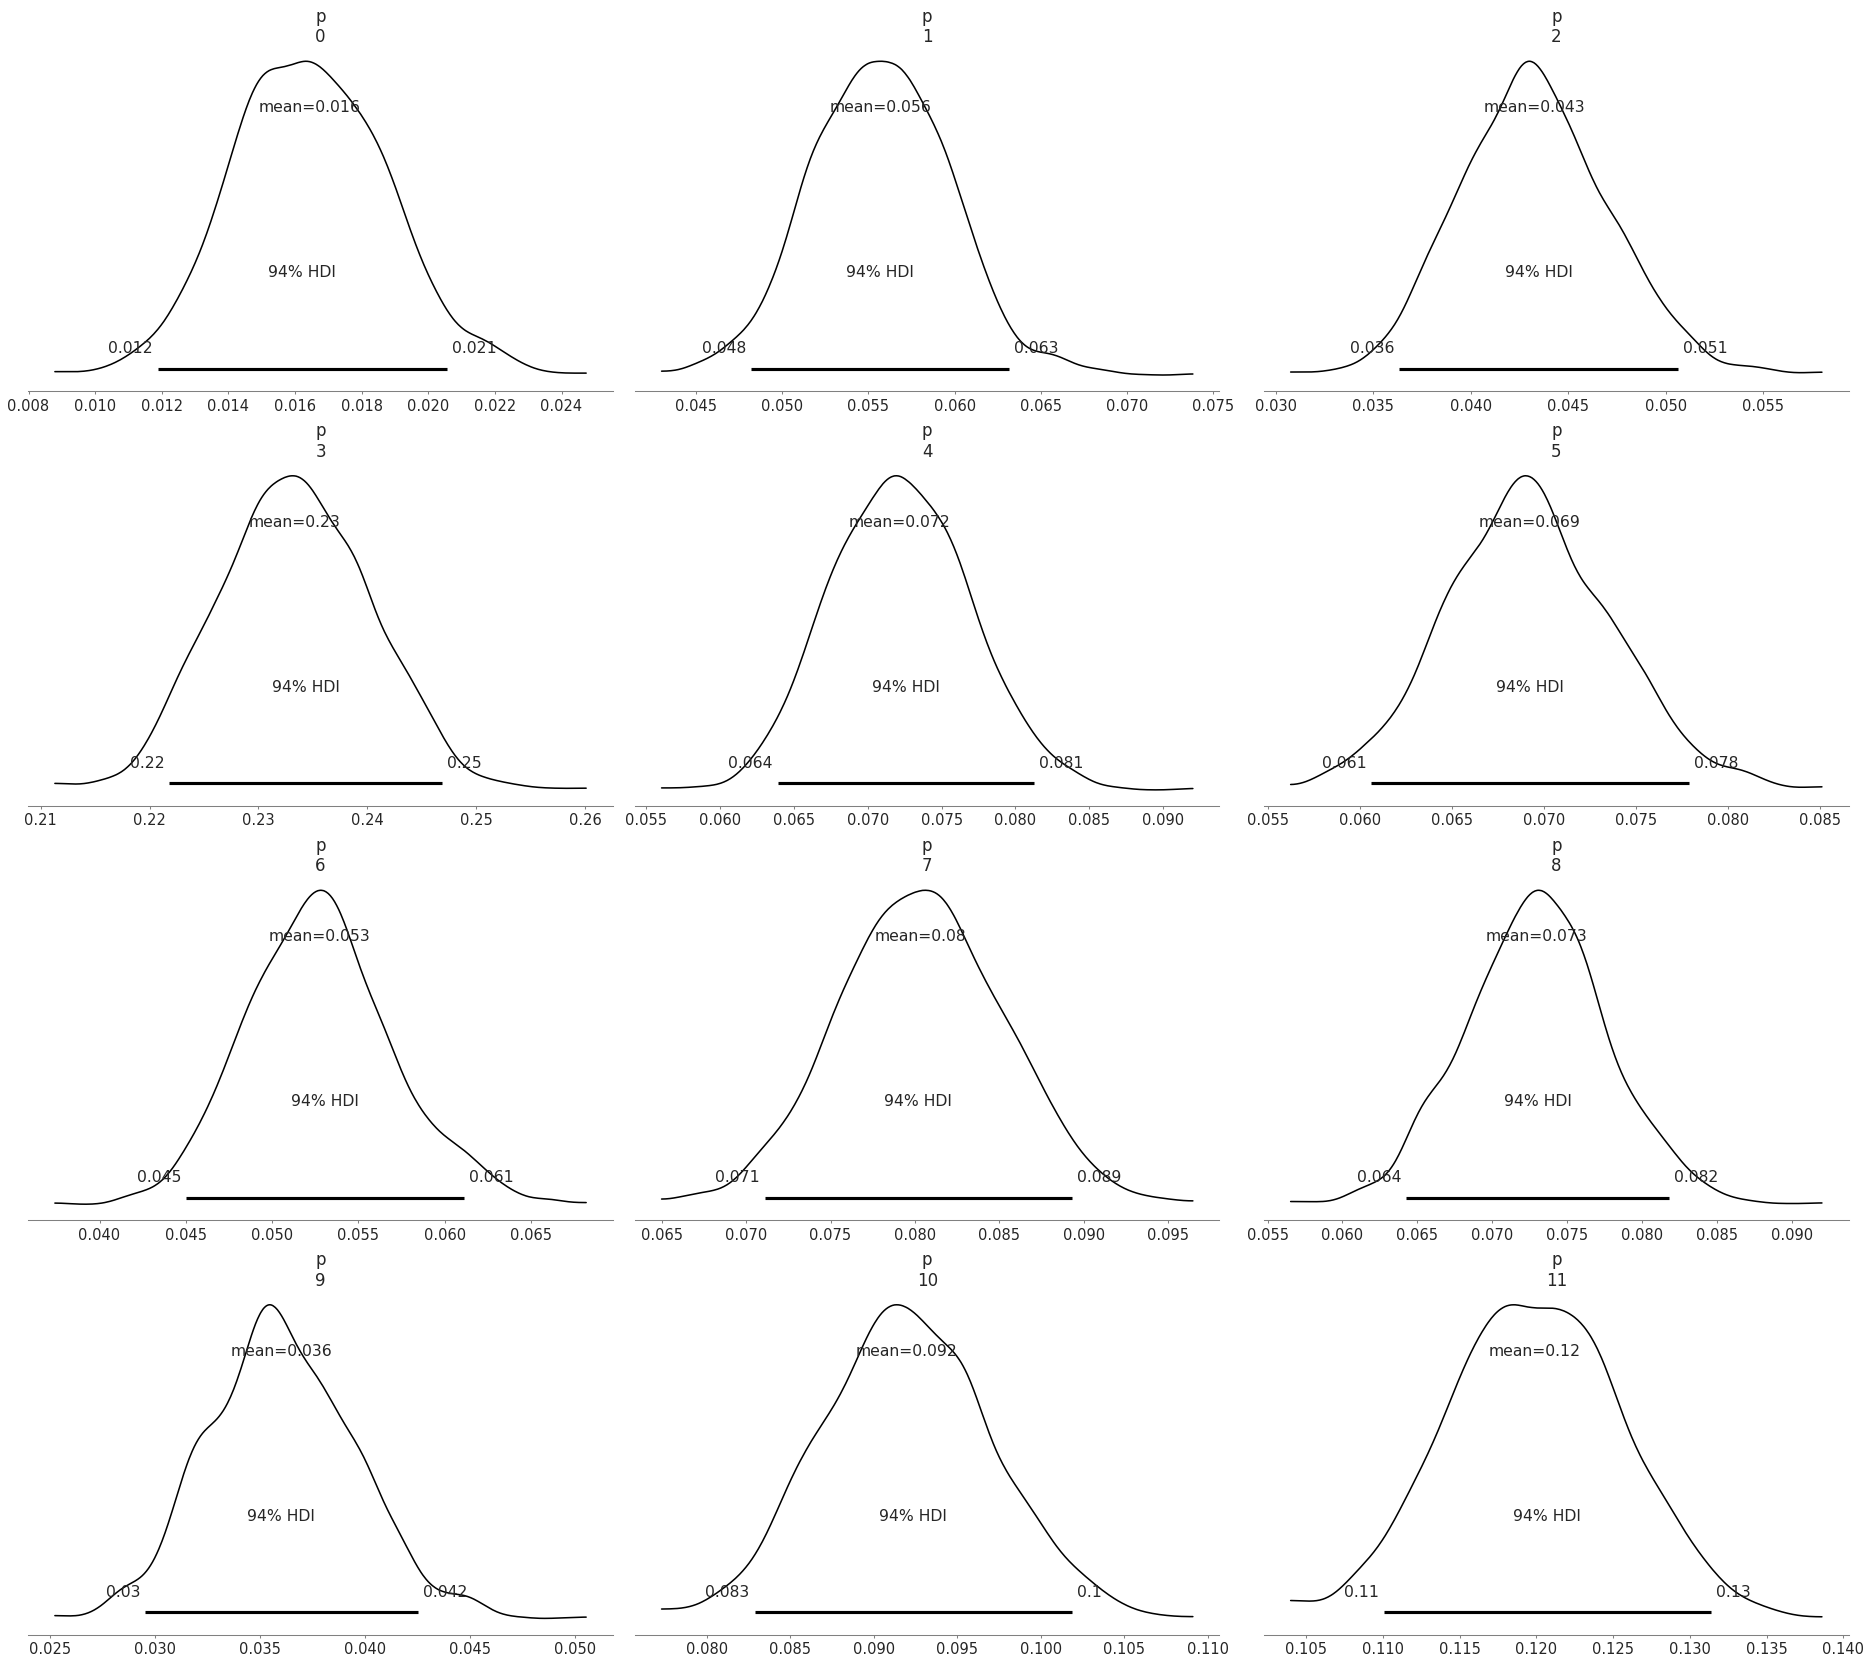

In [ ]:
az.plot_posterior(logit_trace);

KeyError: 'y_obs'

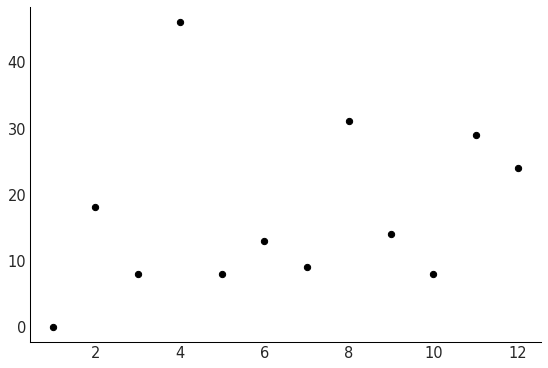

In [ ]:
fig, ax = plt.subplots()

#thinned = logit_trace.posterior.stack(sample=("chain", "draw")).isel(sample=thin_slice)
#ax.plot(xr_plot, xr_plot*thinned.m + thinned.b, c="C0", alpha=0.025)

ax.scatter(hospitals, deaths);

ax.axline(
    (0, logit_trace["y_obs"].mean()),
    slope=logit_trace.posterior["p"].mean(),
    c='C0', label="PyMC OLS"
);